In [110]:
import random
import matplotlib.pyplot as plt
import math
import pandas as pd

In [111]:
def getOut(alpha,S):
    return 1/(math.exp(-alpha*S)+1)

def getE(out,ideal):
    return (1/2)*(ideal-out)**2

def getS(warr,xarr):
    Slocal=0
    for i in range(0,len(warr)):
        Slocal+=warr[i]*xarr[i]
    return Slocal

def dEdw(out,T,x):
    return (out-T)*out*(1-out)*x
def wNext(w,nu,out,T,x):
    return w-nu*dEdw(out,T,x)

def fx2(x1,w1,w2,w3):
    return -((x1*w1)/w2)-(w3/w2)


In [112]:
alpha=1
nu=0.7
Emean=0.005

train_data_size=200
signal_input_size=2
epoch=5



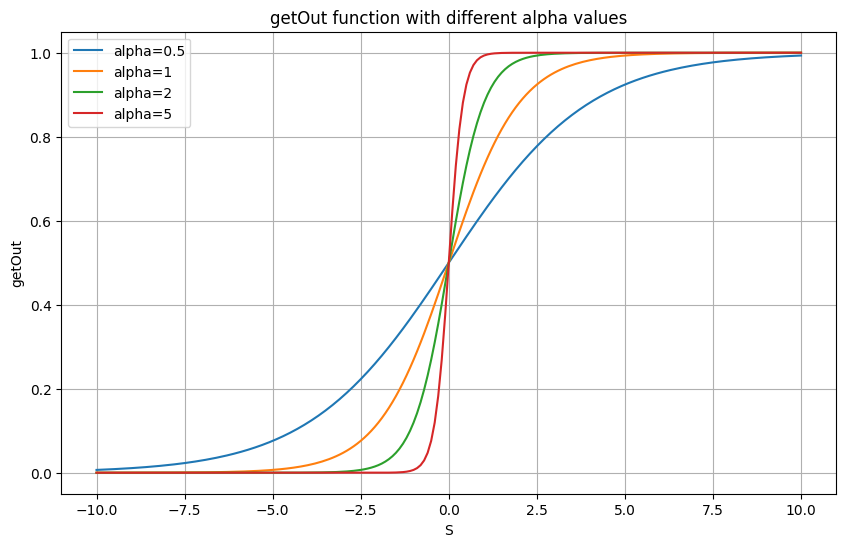

In [113]:
S_values = [i / 10 for i in range(-100, 101)]  # Increase precision by using smaller steps
alpha_values = [0.5, 1, 2, 5]

plt.figure(figsize=(10, 6))

for alpha in alpha_values:
    getOut_values = [getOut(alpha, S) for S in S_values]
    plt.plot(S_values, getOut_values, label=f'alpha={alpha}')

plt.xlabel('S')
plt.ylabel('getOut')
plt.title('getOut function with different alpha values')
plt.legend()
plt.grid()
plt.show()

In [114]:
dataset = pd.read_csv('Лаб1_8.csv')
data_list = dataset.values.tolist()
random.shuffle(data_list)

In [115]:
# for point in data_list:
#     color = 'red' if point[2] == 0 else 'green'
#     plt.scatter(point[0], point[1], color=color)

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Data List Plot')
# plt.grid()
# plt.show()

In [116]:
train=[]
train = data_list[:train_data_size]
random.shuffle(train)

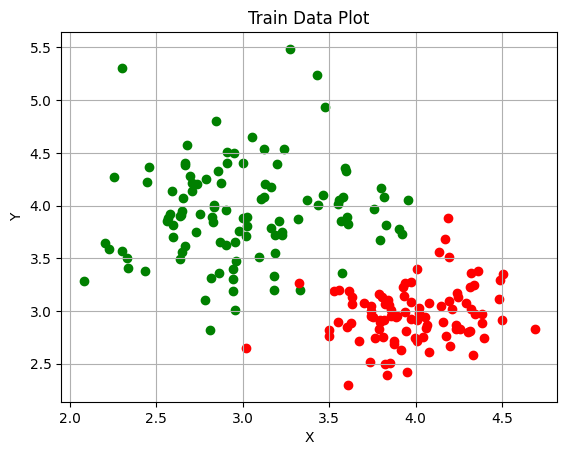

In [117]:
for point in train:
    color = 'red' if point[2] == 0 else 'green'
    plt.scatter(point[0], point[1], color=color)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Train Data Plot')
plt.grid()
plt.show()

In [118]:
# генерування стартових ваг
w=[]
for i in range(0,signal_input_size+1):
    w.append(random.uniform(-1,1))
print(w)
# передача даних на суматор
Sum=0
Sum=getS(w,[train[0][0],train[0][1],1])
print(Sum)
# пердача на функцію активації
out1=getOut(alpha,Sum)
# обрахування попохибки
E1=getE(out1,train[0][2])
# обрахування наступних ваг
w[0]=wNext(w[0],nu,out1,train[0][2],train[0][0])
w[1]=wNext(w[1],nu,out1,train[0][2],train[0][1])
w[2]=wNext(w[2],nu,out1,train[0][2],1)


[-0.34083904077462335, 0.11084862914562277, 0.7220305939299121]
-0.3792060976807139


In [119]:
# початок навчання 
for j in range(epoch):
    for i in range(1,len(train)):
        nu=1/i
        Slocal=getS(w,[train[i][0],train[i][1],1])
        outlocal=getOut(alpha,Slocal)
        Elocal=getE(outlocal,train[i][2])
        while Elocal>Emean:
            Slocal=getS(w,[train[i][0],train[i][1],1])
            out=getOut(alpha,Slocal)
            Elocal=getE(out,train[i][2])
            w[0]=wNext(w[0],nu,out,train[i][2],train[i][0])
            w[1]=wNext(w[1],nu,out,train[i][2],train[i][1])
            w[2]=wNext(w[2],nu,out,train[i][2],1)

        
        # w[0]=wNext(w[0],nu,out,trainshuffle[i][1],trainshuffle[i][0][0])
        # w[1]=wNext(w[1],nu,out,trainshuffle[i][1],trainshuffle[i][0][1])
        # w[2]=wNext(w[2],nu,out,trainshuffle[i][1],1)


print("Ваги")

for i in range(0,len(w)):
    print(w[i])


Ваги
-1.0122374622763282
0.8590317209514166
0.7026585477181818


In [120]:
class0 = []
class1 = []
error=0
error_percent=0
nn_result = []
error_list = []


for i in range(0,len(data_list)):
    S=getS(w,[data_list[i][0],data_list[i][1],1])
    out=getOut(alpha,S)
    if out>0.5:
        class1.append(data_list[i])
        if data_list[i][2]==0:
            error+=1
            error_list.append(data_list[i])
    else:
        class0.append(data_list[i])
        if data_list[i][2]==1:
            error+=1
            error_list.append(data_list[i])

        

error_percent=(error/len(data_list))*100 
print(f"Error: {error_percent}%")

Error: 3.6999999999999997%


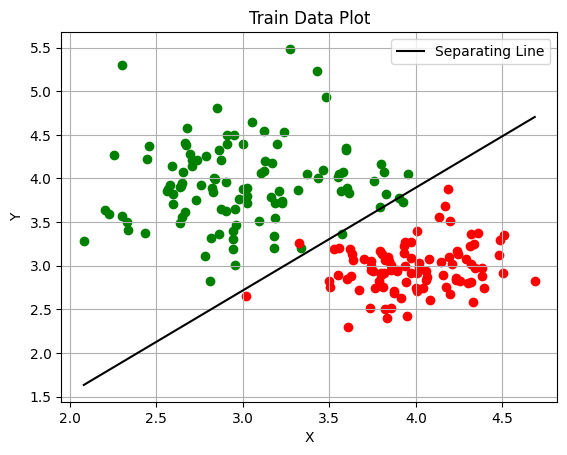

In [121]:
min_x = min([x[0] for x in train])
max_x = max([x[0] for x in train])
x_values = [min_x, max_x]
y_values = [fx2(x, w[0], w[1], w[2]) for x in x_values]

for point in train:
    color = 'red' if point[2] == 0 else 'green'
    plt.scatter(point[0], point[1], color=color)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Train Data Plot')

plt.plot(x_values, y_values, 'k-', label='Separating Line')
plt.legend()
plt.grid()
plt.show()

In [122]:
# min_x = min([x[0] for x in data_list])
# max_x = max([x[0] for x in data_list])
# x_values = [min_x, max_x]
# y_values = [fx2(x, w[0], w[1], w[2]) for x in x_values]

# for point in data_list:
#     color = 'red' if point[2] == 0 else 'green'
    
#     plt.scatter(point[0], point[1], facecolors='none', edgecolors=color)

#     plt.scatter(point[0], point[1], color=color)

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Test Data Plot')

# plt.plot(x_values, y_values, 'k-', label='Separating Line')
# plt.legend()
# plt.grid()
# plt.show()

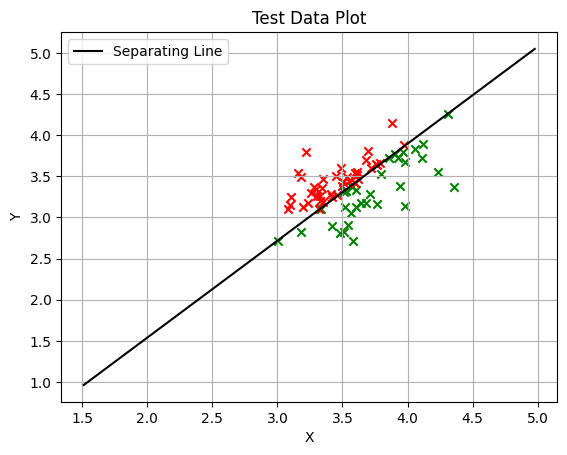

In [123]:
min_x = min([x[0] for x in data_list])
max_x = max([x[0] for x in data_list])
x_values = [min_x, max_x]
y_values = [fx2(x, w[0], w[1], w[2]) for x in x_values]

for point in error_list:
    color = 'red' if point[2] == 0 else 'green'
    plt.scatter(point[0], point[1], color=color, marker='x')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test Data Plot')

plt.plot(x_values, y_values, 'k-', label='Separating Line')
plt.legend()
plt.grid()
plt.show()